In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [53]:
canser = load_breast_cancer()

In [54]:
canser.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [55]:
canser.target_names

array(['malignant', 'benign'], dtype='<U9')

In [56]:
canser.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [57]:
canser.data[0:5]

array([[1.80e+01, 1.04e+01, 1.23e+02, 1.00e+03, 1.18e-01, 2.78e-01,
        3.00e-01, 1.47e-01, 2.42e-01, 7.87e-02, 1.09e+00, 9.05e-01,
        8.59e+00, 1.53e+02, 6.40e-03, 4.90e-02, 5.37e-02, 1.59e-02,
        3.00e-02, 6.19e-03, 2.54e+01, 1.73e+01, 1.85e+02, 2.02e+03,
        1.62e-01, 6.66e-01, 7.12e-01, 2.65e-01, 4.60e-01, 1.19e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, 1.33e+03, 8.47e-02, 7.86e-02,
        8.69e-02, 7.02e-02, 1.81e-01, 5.67e-02, 5.43e-01, 7.34e-01,
        3.40e+00, 7.41e+01, 5.22e-03, 1.31e-02, 1.86e-02, 1.34e-02,
        1.39e-02, 3.53e-03, 2.50e+01, 2.34e+01, 1.59e+02, 1.96e+03,
        1.24e-01, 1.87e-01, 2.42e-01, 1.86e-01, 2.75e-01, 8.90e-02],
       [1.97e+01, 2.12e+01, 1.30e+02, 1.20e+03, 1.10e-01, 1.60e-01,
        1.97e-01, 1.28e-01, 2.07e-01, 6.00e-02, 7.46e-01, 7.87e-01,
        4.58e+00, 9.40e+01, 6.15e-03, 4.01e-02, 3.83e-02, 2.06e-02,
        2.25e-02, 4.57e-03, 2.36e+01, 2.55e+01, 1.52e+02, 1.71e+03,
        1.44e-01, 4.24e-01, 4.50e-01, 2.43e-01

In [58]:
x_train, x_test, y_train, y_test = train_test_split(canser.data, canser.target, test_size = 0.3, random_state = 109)

In [59]:
#kernels = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
#linear
SVM = svm.SVC(kernel = 'linear')
SVM.fit(x_train, y_train)
y_predicted1 = SVM.predict(x_test)
metrics.accuracy_score(y_test, y_predicted1)

0.9649122807017544

In [60]:
#poly
SVM = svm.SVC(kernel = 'poly')
SVM.fit(x_train, y_train)
y_predicted2 = SVM.predict(x_test)
metrics.accuracy_score(y_test, y_predicted2)

0.9181286549707602

In [61]:
#rbf
SVM = svm.SVC(kernel = 'rbf')
SVM.fit(x_train, y_train)
y_predicted3 = SVM.predict(x_test)
metrics.accuracy_score(y_test, y_predicted3)

0.9239766081871345

In [62]:
#sigmoid
SVM = svm.SVC(kernel = 'sigmoid')
SVM.fit(x_train, y_train)
y_predicted4 = SVM.predict(x_test)
metrics.accuracy_score(y_test, y_predicted4)

0.39766081871345027

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 61   2]
 [  4 104]]


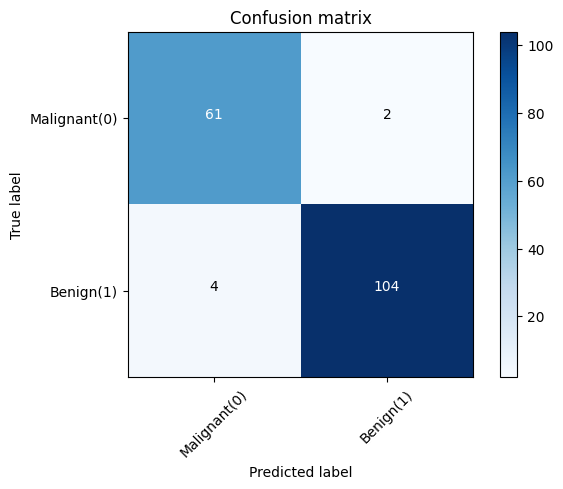

In [66]:
#linear
cnf_matrix = confusion_matrix(y_test, y_predicted1, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Malignant(0)', 'Benign(1)'], normalize = False, title = 'Confusion matrix')

In [71]:
#linear
print(classification_report(y_test, y_predicted1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Confusion matrix, without normalization
[[ 49  14]
 [  0 108]]


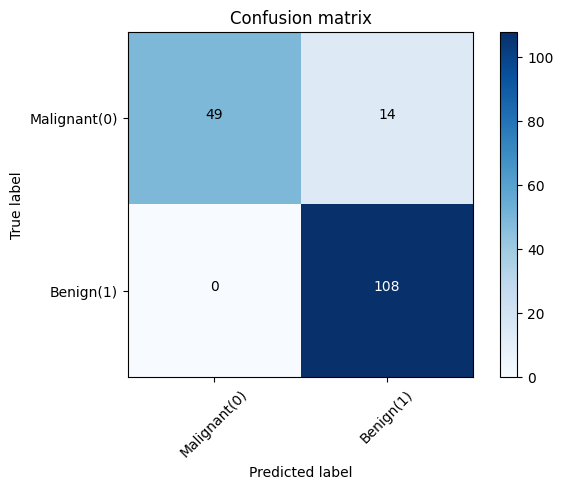

In [67]:
#poly
cnf_matrix = confusion_matrix(y_test, y_predicted2, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Malignant(0)', 'Benign(1)'], normalize = False, title = 'Confusion matrix')

In [72]:
#poly
print(classification_report(y_test, y_predicted2))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.89      1.00      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



Confusion matrix, without normalization
[[ 50  13]
 [  0 108]]


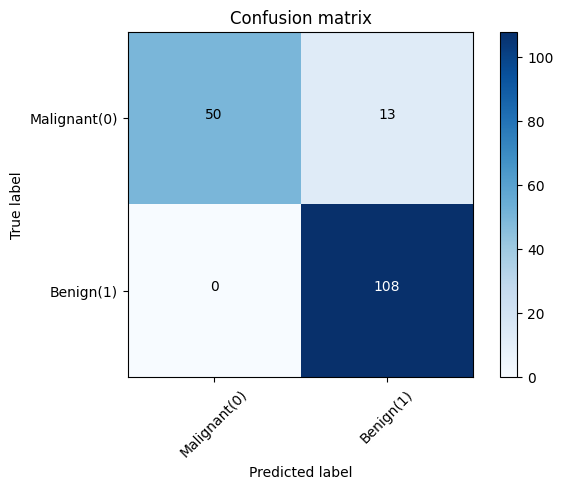

In [68]:
#rbf
cnf_matrix = confusion_matrix(y_test, y_predicted3, labels = [0, 1])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Malignant(0)', 'Benign(1)'], normalize = False, title = 'Confusion matrix')

In [73]:
#rbf
print(classification_report(y_test, y_predicted3))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        63
           1       0.89      1.00      0.94       108

    accuracy                           0.92       171
   macro avg       0.95      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



Confusion matrix, without normalization
[[ 6 57]
 [46 62]]


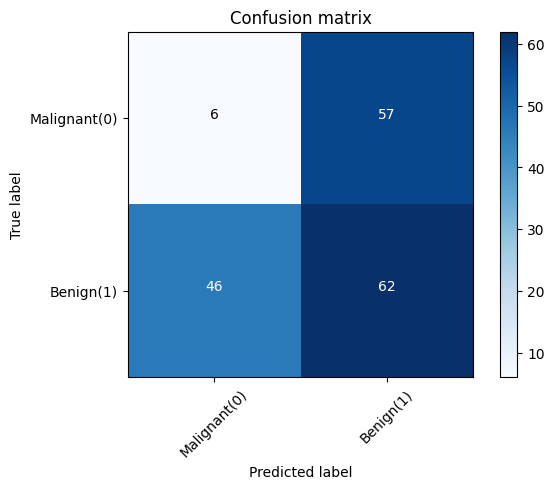

In [69]:
#sigmoid
cnf_matrix = confusion_matrix(y_test, y_predicted4, labels = [0, 1])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Malignant(0)', 'Benign(1)'], normalize = False, title = 'Confusion matrix')

In [74]:
#sigmoid
print(classification_report(y_test, y_predicted4))

              precision    recall  f1-score   support

           0       0.12      0.10      0.10        63
           1       0.52      0.57      0.55       108

    accuracy                           0.40       171
   macro avg       0.32      0.33      0.33       171
weighted avg       0.37      0.40      0.38       171

